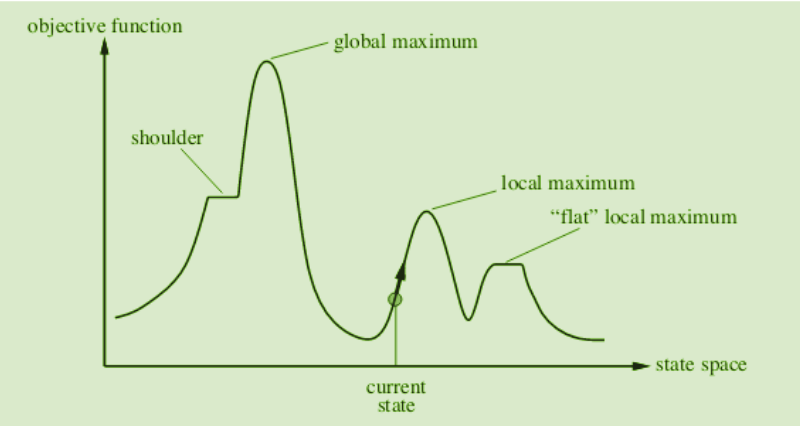

In [23]:
import numpy as np


def find_neighbours(state, landscape):
    neighbours = []
    dim = landscape.shape
    print(dim)
     # Top
    if state[0] != 0:
        neighbours.append((state[0] - 1, state[1]))

    # right neighbour   # Bottom
    if state[0] != dim[0] - 1:
        neighbours.append((state[0] + 1, state[1]))

    # top neighbour  # Left
    if state[1] != 0:
        neighbours.append((state[0], state[1] - 1))

    # bottom neighbour   # Right
    if state[1] != dim[1] - 1:
        neighbours.append((state[0], state[1] + 1))

    # top left   # Top left
    if state[0] != 0 and state[1] != 0:
        neighbours.append((state[0] - 1, state[1] - 1))

    # bottom left  # Top right
    if state[0] != 0 and state[1] != dim[1] - 1:
        neighbours.append((state[0] - 1, state[1] + 1))

    # top right   # Bottom Left 
    if state[0] != dim[0] - 1 and state[1] != 0:
        neighbours.append((state[0] + 1, state[1] - 1))

    # bottom right # Bottom Right
    if state[0] != dim[0] - 1 and state[1] != dim[1] - 1:
        neighbours.append((state[0] + 1, state[1] + 1))
    print(neighbours)
    return neighbours

In [27]:
# Current optimization objective: local/global maximum
def hill_climb(curr_state, landscape):
    neighbours = find_neighbours(curr_state, landscape)
    
    ascended = False
    next_state = curr_state
    for neighbour in neighbours: #Find the neighbour with the greatest value
        if landscape[neighbour[0]][neighbour[1]] > landscape[next_state[0]][next_state[1]]:
            next_state = neighbour
            ascended = True

    return ascended, next_state

[[40 46 41 10 47 46 19 14 43 10]
 [ 6  2 44 27 29 25  4  7 16 29]
 [18 28 15  8 40 35  7 38 37 24]
 [25 20  9 13  9  8 10 24 40  2]
 [32  6 29 21 48 33 42 10  9 20]
 [15 35 19 27 11  3  8 38  4 40]
 [49 30 29 47 10 14 45 31 15  2]
 [47 28 23 13 47 29 36 38 39 26]
 [ 2 32  8 13 23 34 28 39 31 16]
 [27 31 38 36  8 43  7 19 39 42]]

Step # 1
Current state coordinates:  (3, 6)
Current state value:  10
(10, 10)
[(2, 6), (4, 6), (3, 5), (3, 7), (2, 5), (2, 7), (4, 5), (4, 7)]

Step # 2
Current state coordinates:  (4, 6)
Current state value:  42
(10, 10)
[(3, 6), (5, 6), (4, 5), (4, 7), (3, 5), (3, 7), (5, 5), (5, 7)]

Step # 3
Optimization objective reached.
Final state coordinates:  (4, 6)
Final state value:  42


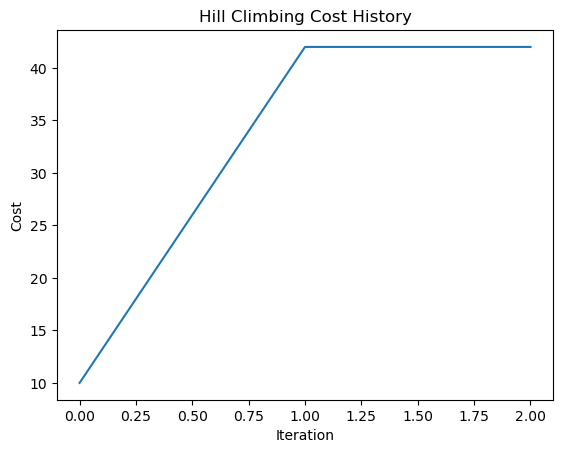

In [26]:
import matplotlib.pyplot as plt

def __main__():
    landscape = np.random.randint(1, high=50, size=(10, 10))
    print(landscape)
    start_state = (3, 6)  # matrix index coordinates
    current_state = start_state
    cost_history =[landscape[current_state[0]][current_state[1]]]
    count = 1
    ascending = True
    while ascending:
        print("\nStep #", count)
        print("Current state coordinates: ", current_state)
        print("Current state value: ", landscape[current_state[0]][current_state[1]])
        count += 1
        ascending, current_state = hill_climb(current_state, landscape)
        cost_history.append(landscape[current_state[0]][current_state[1]])
        

    print("\nStep #", count)
    print("Optimization objective reached.")
    print("Final state coordinates: ", current_state)
    print("Final state value: ", landscape[current_state[0]][current_state[1]])
    
    # Plot the cost history
    plt.plot(cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Hill Climbing Cost History")
    plt.show()

__main__()

In [ ]:
def simulated_annealing(matrix, T_0=100, cooling_rate=0.95, max_iterations=1000):
  """
  Finds the maximum value in the matrix using Simulated Annealing.

  Args:
      matrix: The 10x10 matrix to search.
      T_0: Initial temperature.
      cooling_rate: Rate at which temperature cools down.
      max_iterations: Maximum number of iterations.

  Returns:
      A tuple containing the best state (matrix index coordinates) and its value.
  """
    current_state = (3, 6)  # Starting state (replace with a random starting point if desired)
    current_value = matrix[current_state[0], current_state[1]]
    best_state = current_state
    best_value = current_value

    T = T_0  # Reset temperature for each iteration
    ascending = False
    while T > 0.01:
        neighbor_states = get_neighbors(current_state, matrix)
        new_state = random.choice(neighbor_states)
        new_value = matrix[new_state[0], new_state[1]]

        delta_E = new_value - current_value

        # Accept improvement unconditionally
        if delta_E > 0:
            current_state = new_state
            current_value = new_value

        # Accept worse solutions with a probability based on temperature
        elif random.random() < np.exp(delta_E / T):
            current_state = new_state
            current_value = new_value

        T *= cooling_rate  # Cool down temperature

        # Update best state if found a better one
        if current_value > best_value:
            best_state = current_state
            best_value = current_value
            ascending = True

    return ascending,best_state